# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns
import time

notebookstart = time.time()

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2021-09-27T11:55:09.999216+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

seaborn: 0.10.1
nicaviz: 0.1.1
numpy  : 1.18.1
pandas : 1.2.3



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
1220,0,6,g,q,red,True,7.867616,8.120147,2021-05-05,2018-01-03 01:21:29
495,2,7,f,q,blue,False,7.896324,-0.040017,2019-05-11,2018-01-03 11:51:27
3156,3,19,c,r,red,False,6.827308,-0.478220,2026-08-23,2018-01-03 16:04:20
2313,4,16,e,r,red,True,5.432009,5.464053,2024-05-02,2018-02-28 06:01:34
4160,0,6,d,r,blue,True,3.114912,-3.766903,2029-05-23,2018-02-11 09:17:34
1699,4,0,e,q,red,False,7.188196,-3.702945,2022-08-27,2018-02-05 07:50:01
4574,0,8,g,t,red,False,1.346877,1.708496,2030-07-11,2018-02-07 23:07:37
1054,4,2,c,e,red,False,0.479111,-3.048927,2020-11-20,2018-02-09 03:52:51
1498,3,10,f,y,blue,True,2.807132,1.571933,2022-02-07,2018-01-03 06:01:03
3172,2,15,d,w,red,True,4.818560,1.367423,2026-09-08,2018-02-03 07:54:00


In [4]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,1,6,b,t,blue,False,0.808114,12.923028,2018-01-01,2018-02-23 22:29:53
1,3,13,c,w,blue,True,3.638314,19.187383,2018-01-02,2018-02-15 08:16:25
2,4,4,g,r,red,True,4.237107,3.244571,2018-01-03,2018-01-02 07:19:07
3,0,1,f,w,blue,True,7.295912,1.478176,2018-01-04,2018-01-31 13:15:52
4,0,10,a,y,blue,False,7.844769,-3.949460,2018-01-05,2018-02-10 23:37:14


In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,0,1045,2,1008,4,1001.0,3,980.0,1,966.0
int_med,20,0,int64,16,290,19,271,11,270.0,3,269.0,1,264.0
str_med,7,0,object,e,768,d,730,c,721.0,a,707.0,f,700.0
str_med_two,6,0,object,r,859,y,844,q,837.0,e,833.0,t,816.0
str_small,2,0,object,red,2504,blue,2496,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2515,False,2485,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,1.59463,1,0.465767,1,6.674452,1.0,6.825501,1.0,2.612437,1.0
cont_uni,5000,0,float64,-13.000082,1,4.591141,1,-4.197538,1.0,-8.889812,1.0,17.07495,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


In [6]:
with nicaviz.timer("Reduce Memory"):
    df, na_list = nicaviz.reduce_mem_usage(df)

DF Memory Before  :            0.35 MB
DF Memory After   :            0.24 MB
Reduced by        :           30.13 %

Numeric Columns with NAN replaced with -1:
[]
[Reduce Memory] done in 0.0 s


In [7]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,uint8,0,1045,2,1008,4,1001.0,3,980.0,1,966.0
int_med,20,0,uint8,16,290,19,271,11,270.0,3,269.0,1,264.0
str_med,7,0,object,e,768,d,730,c,721.0,a,707.0,f,700.0
str_med_two,6,0,object,r,859,y,844,q,837.0,e,833.0,t,816.0
str_small,2,0,object,red,2504,blue,2496,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2515,False,2485,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float32,5.65903,1,7.612525,1,5.913504,1.0,6.354764,1.0,5.124363,1.0
cont_uni,5000,0,float32,-10.148499,1,0.951727,1,3.460167,1.0,2.174222,1.0,-2.607315,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


[Count Plot] done in 0.0 s


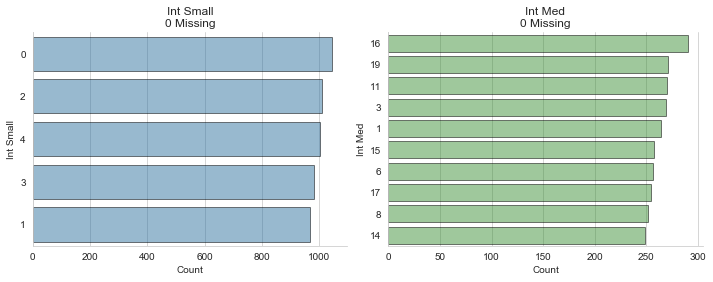

In [8]:
with nicaviz.timer("Count Plot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

[Bar Plot] done in 0.0 s


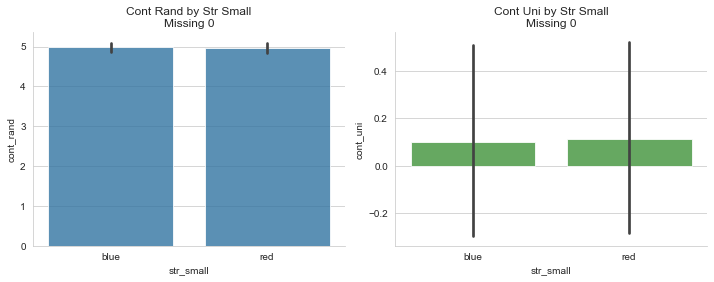

In [9]:
with nicaviz.timer("Bar Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        x_var = "str_small",
        plottype = "bar")

[Boxplots] done in 0.0 s


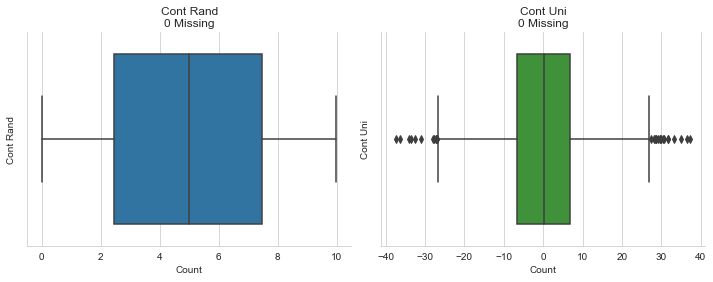

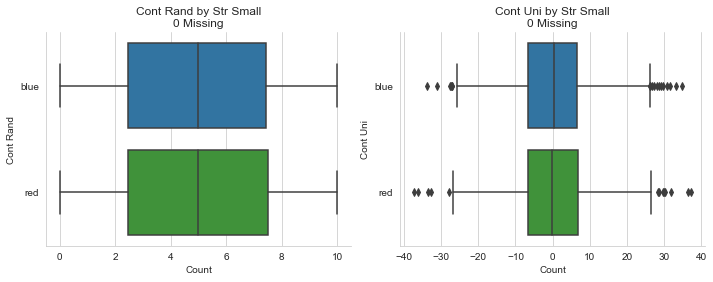

In [10]:
with nicaviz.timer("Boxplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "boxplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "boxplot")

[Distplots] done in 1.0 s


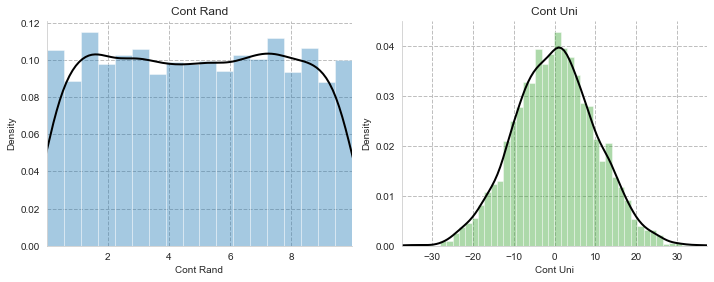

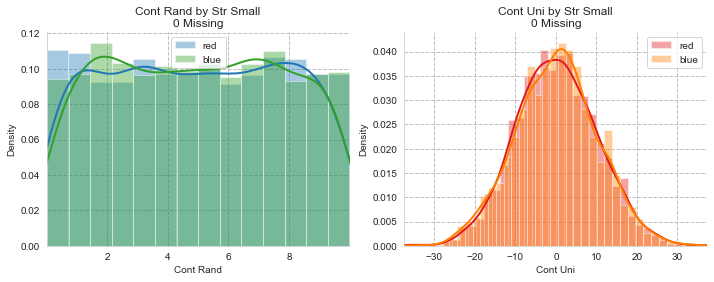

In [11]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "distplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "distplot")

[Distplots] done in 0.0 s


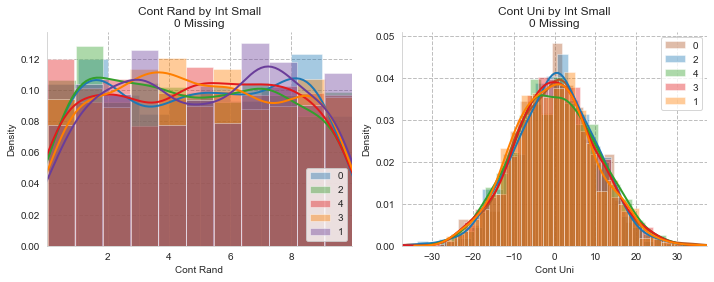

In [12]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "int_small",
        plottype = "distplot")

[Countplot] done in 1.0 s


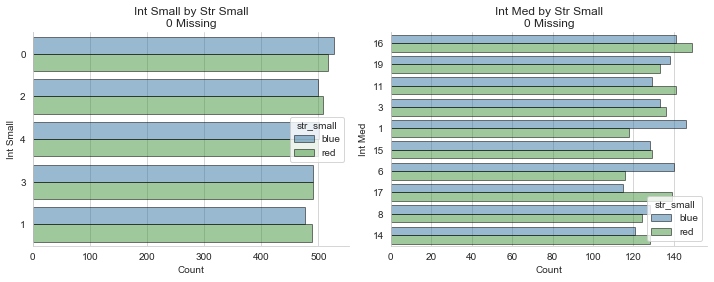

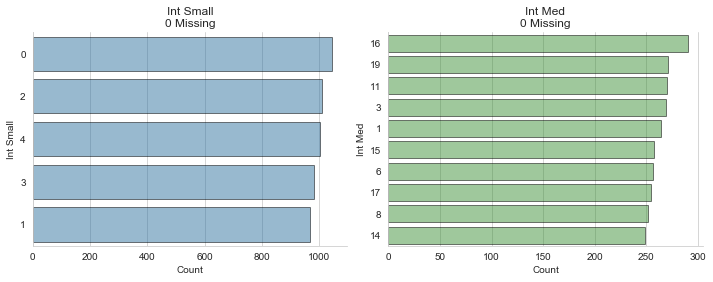

In [13]:
with nicaviz.timer("Countplot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        hue = "str_small",
        plottype = "countplot")

    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

### Time Series

[Timeserie Resample Plot] done in 1.0 s


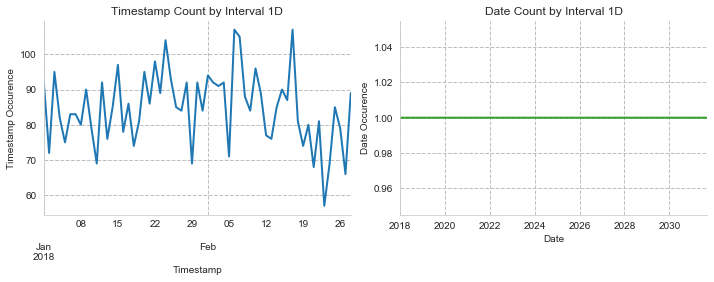

In [14]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1D"
    )

[Timeserie Resample Plot] done in 0.0 s


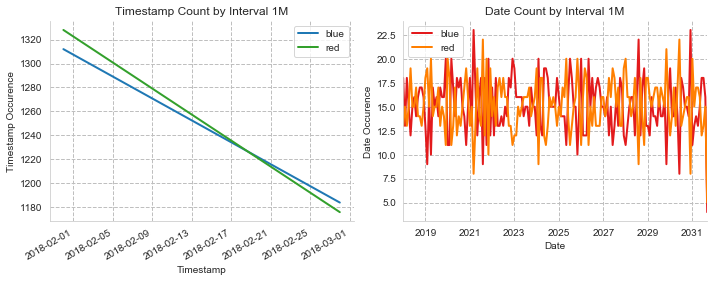

In [15]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        hue = "str_small",
        resample_interval="1M"
    )

[Timeserie Rolling Plot] done in 0.0 s


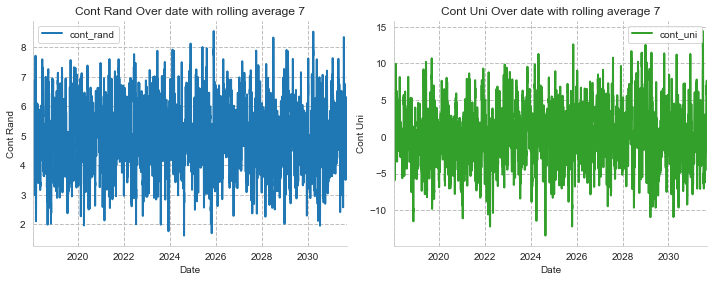

In [16]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        x_var="date",
        rolling=True,
        r=7
    )

[Timeserie Rolling Plot] done in 0.0 s


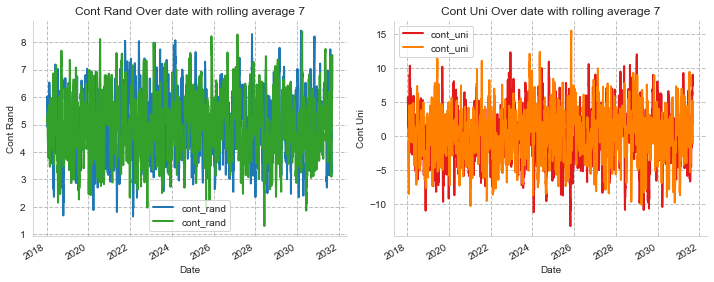

In [17]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        hue = "str_small",
        x_var="date",
        rolling=True,
        r=7
    )

### WordClouds

[Wordcloud Plot] done in 1.0 s


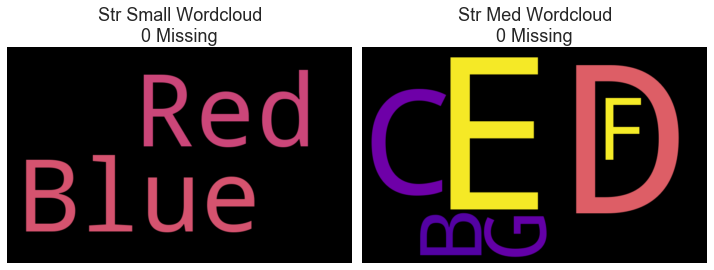

In [18]:
with nicaviz.timer("Wordcloud Plot"):
    df.nica.mass_plot(
        plt_set= ["str_small", "str_med"],
        plottype = "wordcloud")

### Rank Correlations

[Correlation Plot] done in 5.0 s


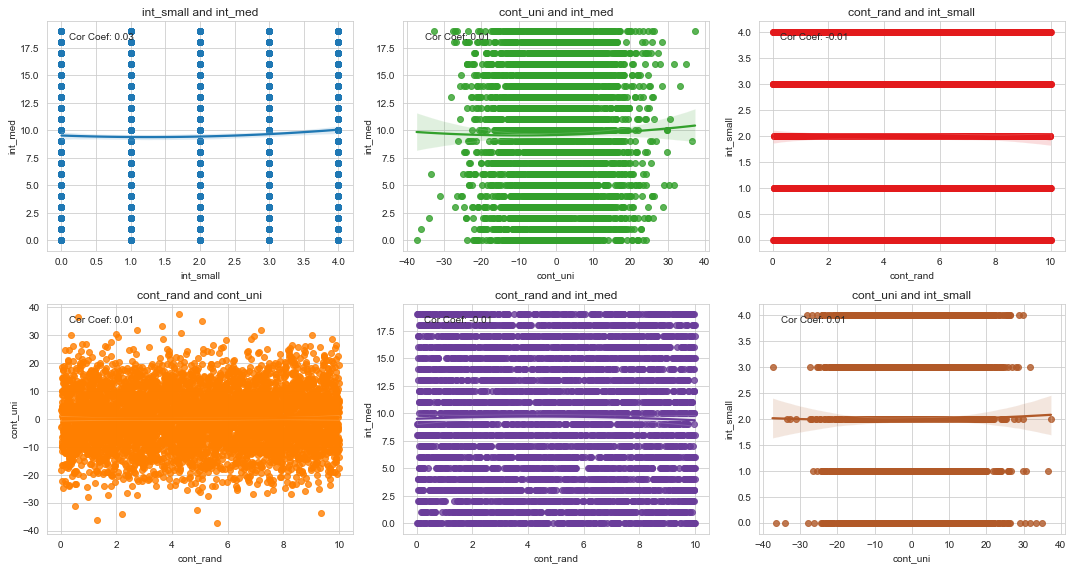

In [19]:
with nicaviz.timer("Correlation Plot"):
    df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

In [ ]:
with nicaviz.timer("Pivot Heatmap Plot"):
    categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
    df.nica.pivot_plots(categorical, "cont_rand", np.sum)

In [ ]:
with nicaviz.timer("Pivot Heatmap Plot"):
    df.nica.pivot_plots(categorical, "cont_rand", np.mean)

In [ ]:
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))